<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Изучение-модели-без-учёта-дисбаланса" data-toc-modified-id="Изучение-модели-без-учёта-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение модели без учёта дисбаланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Использование-метода-upsample" data-toc-modified-id="Использование-метода-upsample-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Использование метода upsample</a></span></li><li><span><a href="#Использование-метода-downsample" data-toc-modified-id="Использование-метода-downsample-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Использование метода downsample</a></span></li><li><span><a href="#Улучшение-модели" data-toc-modified-id="Улучшение-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Улучшение модели</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импортируем билиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, 
                             roc_auc_score, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import product

import tqdm

import warnings
warnings.filterwarnings("ignore")

Загружаем и смотрим данные

In [2]:
data = pd.read_csv('/Users/sirena0789/Downloads/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Сколько лет человек является клиентом банка - важный параметр, поэтому смею предположить, что эти пропуски будет логиечней не удалять, а заполнить их значением, отличным от остальных.

In [5]:
data['Tenure'] = data['Tenure'].fillna(-1)

**Вывод:**  
Признаки:  
RowNumber — индекс строки в данных (не несет ценности, но будет тормозить модель, следовательно, его можно дропнуть)  
CustomerId — уникальный идентификатор клиента (тоже можно удалить)   
Surname — фамилия (удаляем, так как для предсказаний нет весомой ценности)  
CreditScore — кредитный рейтинг   
Geography — страна проживания (требуется выполнить преобразование OHE)  
Gender — пол (требуется выполнить преобразование OHE)   
Age — возраст  
Tenure — сколько лет человек является клиентом банка  
Balance — баланс на счёте  
NumOfProducts — количество продуктов банка, используемых клиентом  
HasCrCard — наличие кредитной карты  
IsActiveMember — активность клиента  
EstimatedSalary — предполагаемая зарплата  
Целевой признак:  
Exited — факт ухода клиента 

Целевой признак является категориальным, поэтому будет логично использовать задачу классификации

In [6]:
a = ['RowNumber','CustomerId', 'Surname']
df = data.drop(a, axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [7]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Разделим наши данные на обучающую, валидационнаую и тестовую выборки в соотношении 60/20/20

In [10]:
features = df.drop('Exited', axis=1)
target = df['Exited']

In [11]:
features_train, features_other, target_train, target_other = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    random_state=12345, 
                                                    stratify=target)

In [12]:
features_valid, features_test, target_valid, target_test = train_test_split(features_other,
                                                    target_other,
                                                    train_size=0.5,
                                                    random_state=12345, 
                                                    stratify=target_other)

Стандартизируем данные

In [13]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [15]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2837,-1.040434,0.953312,0.474986,0.774657,-0.914708,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,-1.675197,1.910540,-0.914708,1,1,-0.258658,0,0,0
8746,0.103585,-0.476537,1.089324,0.481608,0.820981,0,1,1.422836,0,0,1
660,-0.184996,0.190726,-1.675197,0.088439,-0.914708,1,1,-1.160427,1,0,0
3610,-0.720933,1.620574,-1.060859,0.879129,-0.914708,1,0,0.113236,0,0,0


In [16]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6612,502.0,64.0,3.0,139663.37,1.0,0,1,100995.11,0,0,0
519,707.0,58.0,6.0,89685.92,1.0,0,1,126471.13,0,0,1
1609,619.0,35.0,8.0,132292.63,1.0,1,0,65682.93,0,0,0
3475,769.0,31.0,4.0,61297.05,2.0,1,1,7118.02,0,0,1
2707,637.0,38.0,3.0,104339.56,1.0,0,0,119882.86,0,0,0


In [17]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
657,601.0,54.0,1.0,1.310400e+05,2.0,1,1,199661.50,1,0,0
2083,534.0,24.0,1.0,-1.427007e-16,1.0,1,1,169653.32,0,0,1
3234,527.0,47.0,1.0,-1.427007e-16,1.0,1,0,21312.16,0,0,1
1551,730.0,52.0,7.0,-1.427007e-16,2.0,0,1,122398.84,0,1,0
2344,714.0,49.0,4.0,9.305934e+04,1.0,1,0,7571.51,1,0,0


## Исследование задачи

### Баланс классов

Для исследования используем три разных модели.    
Здесь:  
модель 1 - дерево решений;  
модель 2 - случайный лес;  
модель 3 - логистическая регрессия.
Но для начала прикинем баланс классов.

In [18]:
target_train.value_counts(normalize = 1)

0    0.796333
1    0.203667
Name: Exited, dtype: float64

In [19]:
target_valid.value_counts(normalize = 1)

0    0.796
1    0.204
Name: Exited, dtype: float64

Перекос в пользу отрицательных ответов очень велик. Модель вероятнее всего обучится плохо.

Рассчетаем точность

In [20]:
def accuracy(features_train, target_train, features_valid, target_valid):
    model_1 = DecisionTreeClassifier(random_state=12345)
    score_1 = model_1.fit(features_train, target_train).score(features_valid,
                                                              target_valid)
    
    model_2 = RandomForestClassifier(random_state=12345, n_estimators = 100)
    score_2 = model_2.fit(features_train, target_train).score(features_valid,
                                                              target_valid)
    
    model_3 = LogisticRegression(solver = 'liblinear')
    score_3 = model_3.fit(features_train, target_train).score(features_valid, 
                                                              target_valid)
    print(' Точность модели','\n', 'Дерево решений: ', score_1, '\n',
          'Случайный лес: ', score_2, '\n', 'Логистческая регрессия: ', score_3)

In [21]:
accuracy(features_train, target_train, features_valid, target_valid)

 Точность модели 
 Дерево решений:  0.719 
 Случайный лес:  0.3615 
 Логистческая регрессия:  0.205


Далее посмторим как работают модели

### Изучение модели без учёта дисбаланса

In [22]:
def share(features_train, target_train, features_valid, target_valid):
    model_1 = DecisionTreeClassifier(random_state=12345)
    model_1.fit(features_train, target_train)
    share_1 = pd.Series(model_1.predict(features_valid)).value_counts(
        normalize = 1)

    model_2 = RandomForestClassifier(random_state=12345, n_estimators = 100)
    model_2.fit(features_train, target_train)
    share_2 = pd.Series(model_2.predict(features_valid)).value_counts(
        normalize = 1)
    
    model_3 = LogisticRegression(solver = 'liblinear')
    model_3.fit(features_train, target_train)
    share_3 = pd.Series(model_3.predict(features_valid)).value_counts(
        normalize = 1)
    

    print(' Доля ответов', '\n', 'Дерево решений: ', '\n', share_1, '\n',
          'Случайный лес: ', '\n', share_2, '\n', 'Логистческая регрессия: ', '\n',
          share_3)

In [23]:
share(features_train, target_train, features_valid, target_valid)

 Доля ответов 
 Дерево решений:  
 0    0.883
1    0.117
dtype: float64 
 Случайный лес:  
 1    0.6915
0    0.3085
dtype: float64 
 Логистческая регрессия:  
 1    0.999
0    0.001
dtype: float64


Самая высокая точность наблюдается у случайного леса, но большенство ответов различных моделей сводятся к ответу "0", поэтому считаю необходимым сравнить результаты с константной "нулевой "моделью, чтоб не допустить возможность дисбаланса.

Создаем константную модель

In [24]:
target_predict_const = pd.Series([0]*len(target_valid))
accuracy_const = accuracy_score(target_valid, target_predict_const)
accuracy_const

0.796

Хотя точность у константной модели ниже, чем у действующих меня никто не остановит до конца убедиться в правильности и посмотреть метрики.

Матрица ошибок для дерева решений

In [25]:
model_1 = DecisionTreeClassifier(random_state=12345)
model_1.fit(features_train, target_train)
prediction_1 = model_1.predict(features_valid)
prob_1 = model_1.predict_proba(features_valid)[:, 1]
confusion_matrix(target_valid, prediction_1)

array([[1398,  194],
       [ 368,   40]])

In [26]:
def metrics(target_valid, prediction, prob):
    print("Полнота" , recall_score(target_valid, prediction))
    print("Точность", precision_score(target_valid, prediction))
    print("F1 мера", f1_score(target_valid, prediction))
    print("AUC ROC", roc_auc_score(target_valid, prob))

In [27]:
metrics(target_valid, prediction_1, prob_1)

Полнота 0.09803921568627451
Точность 0.17094017094017094
F1 мера 0.12461059190031154
AUC ROC 0.48808995960193124


По результатам можно сказать, что модель выдает много истинноотрицательных ответов, но при этом и достаточное количество ложноположительных. Метрики показывают сомнительные результаты.

Матрица ошибок для случайного леса

In [28]:
model_2 = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_2.fit(features_train, target_train)
prediction_2 = model_2.predict(features_valid)
prob_2 = model_2.predict_proba(features_valid)[:, 1]
confusion_matrix(target_valid, prediction_2)

array([[ 466, 1126],
       [ 151,  257]])

In [29]:
metrics(target_valid, prediction_2, prob_2)

Полнота 0.6299019607843137
Точность 0.18582791033984092
F1 мера 0.2869905080960357
AUC ROC 0.4389394891122278


Модель случайного леса также показала себя не лучшим образом.

Матрица ошибок для логистической регрессии

In [30]:
model_3 = LogisticRegression(solver = 'liblinear')
model_3.fit(features_train, target_train)
prediction_3 = model_3.predict(features_valid)
prob_3 = model_3.predict_proba(features_valid)[:, 1]
confusion_matrix(target_valid, prediction_3)

array([[   2, 1590],
       [   0,  408]])

In [31]:
metrics(target_valid, prediction_3, prob_3)

Полнота 1.0
Точность 0.2042042042042042
F1 мера 0.3391521197007481
AUC ROC 0.5000631219824614


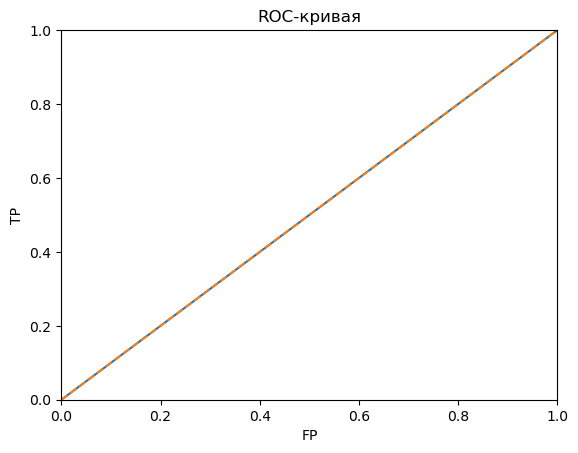

In [32]:
fpr, tpr, thresholds = roc_curve(target_valid, prob_3) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC-кривая')
plt.show()

Логистическая регрессия выдает хорошие резултаты, но возможно это связанно с большим количеством "отрицательных" ответов в выборке. Необходимо сбалансировать ее и посмотреть результаты.

Теперь попробуем улучшить наши модели путем перебора максимальной глубины деревьев.

In [33]:
max_depth = 0
best_model_1 = None
best_result_1 = 0
for depth in range(1, 100):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    pred = model.predict(features_valid)
    prob = model.predict_proba(features_valid)[:, 1]
    result = f1_score(target_valid, pred)
    ra = roc_auc_score(target_valid, prob)
    if result > best_result_1:
        best_model_1 = model
        best_result_1 = result
        max_depth = depth
        roc_auc_1 = ra
print("max_depth =", depth)
print("F1 =", best_result_1)
print("AUC ROC =", roc_auc_1)

max_depth = 99
F1 = 0.3743627093954843
AUC ROC = 0.5925891713469308


In [34]:
max_est = 0
best_model_2 = None
best_result_2 = 0
for est in range(1, 100):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train, target_train) 
    pred = model.predict(features_valid)
    prob = model.predict_proba(features_valid)[:, 1]
    result = f1_score(target_valid, pred)
    ra = roc_auc_score(target_valid, prob)
    if result > best_result_2:
        best_model_2 = model
        best_result_2 = result
        max_est = est
        roc_auc_2 = ra
print("max_est =", max_est)
print("F1 =",best_result_2)
print("AUC ROC =", roc_auc_2)

max_est = 25
F1 = 0.36190476190476184
AUC ROC = 0.5310560153709726


In [35]:
max_it = 0
best_model_3 = None
best_result_3 = 0
for it in range(1, 100):
    model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=it)
    model.fit(features_train, target_train)
    pred = model.predict(features_valid)
    prob = model.predict_proba(features_valid)[:, 1]
    result = f1_score(target_valid, pred)
    ra = roc_auc_score(target_valid, prob)
    if result > best_result_3:
        best_model_3 = model
        best_result_3 = result
        max_it = it
        roc_auc_3 = ra
print("max_it =", max_it)
print("F1 =", best_result_3)
print("AUC ROC =", roc_auc_3)

max_it = 1
F1 = 0.3391521197007481
AUC ROC = 0.5000962225342398


## Борьба с дисбалансом

Пришло время балансировать выборки. Соотношение отрицательных ответов к положительным примерно 8/2. Увеличим количество положительных в 4 раза.

<AxesSubplot:ylabel='Frequency'>

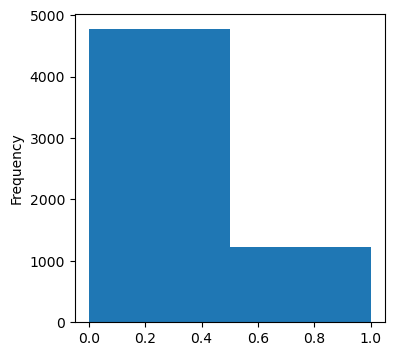

In [36]:
target_train.plot(kind ='hist', bins=2, figsize=(4,4))

In [37]:
target_valid.value_counts(normalize = 1)

0    0.796
1    0.204
Name: Exited, dtype: float64

### Использование метода upsample

In [38]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
        
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
    features_upsampled, target_upsampled, random_state=12345)
      
    return features_upsampled, target_upsampled

In [39]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)
print(target_train_upsampled.value_counts(normalize = 1))

1    0.50569
0    0.49431
Name: Exited, dtype: float64


<AxesSubplot:ylabel='Frequency'>

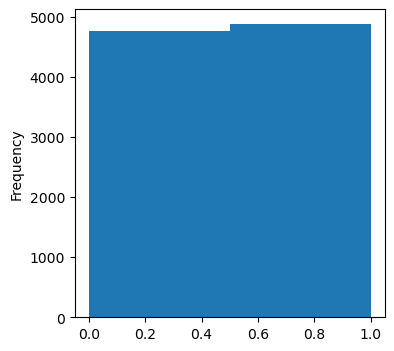

In [40]:
target_train_upsampled.plot(kind ='hist', bins=2, figsize=(4,4))

### Использование метода downsample

Вместо увеличения меньшего класса можно попробовать уменьшить количество элементов большего класса. В нашем случае придется оставить 1/4 от выборки.

In [41]:
def downsample(features, target, fraction): 
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
    [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
    [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle( features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [42]:
features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)
print(target_train_downsampled.value_counts(normalize = 1))

1    0.505795
0    0.494205
Name: Exited, dtype: float64


И вуаля! Мы получили сбалансированную выборку. Можно обучать и тестить.

Проверим точность и остальные метрики наших моделей на новых выборках

In [43]:
print('Метод upsample')
accuracy(features_train_upsampled, target_train_upsampled, 
                    features_valid, target_valid)

Метод upsample
 Точность модели 
 Дерево решений:  0.796 
 Случайный лес:  0.602 
 Логистческая регрессия:  0.205


In [42]:
print('Метод downsample')
accuracy(features_train_downsampled, target_train_downsampled, 
                    features_valid, target_valid)

Метод downsample
 Точность модели 
 Дерево решений:  0.7155 
 Случайный лес:  0.79 
 Логистческая регрессия:  0.725


Дерево решений 

In [44]:
print('Метод upsample')
model_1_upsampled = DecisionTreeClassifier(random_state=12345)
model_1_upsampled.fit(features_train_upsampled, target_train_upsampled)
prediction_upsampled_1 = model_1_upsampled.predict(features_valid)
prob_1_upsampled = model_1.predict_proba(features_valid)[:, 1]
metrics(target_valid, prediction_upsampled_1, prob_1_upsampled)

Метод upsample
Полнота 0.0
Точность 0.0
F1 мера 0.0
AUC ROC 0.48808995960193124


In [45]:
print('Метод downsample')
model_1_downsampled = DecisionTreeClassifier(random_state=12345)
model_1_downsampled.fit(features_train_downsampled, target_train_downsampled)
prediction_downsampled_1 = model_1_downsampled.predict(features_valid)
prob_1_downsampled = model_1.predict_proba(features_valid)[:, 1]
metrics(target_valid, prediction_downsampled_1, prob_1_downsampled)

Метод downsample
Полнота 0.7181372549019608
Точность 0.24254966887417218
F1 мера 0.3626237623762376
AUC ROC 0.48808995960193124


Случайный лес

In [46]:
print('Метод upsample')
model_2_upsampled = RandomForestClassifier(random_state=12345, 
                                           n_estimators = 100)
model_2_upsampled.fit(features_train_upsampled, target_train_upsampled)
prediction_upsampled_2 = model_2_upsampled.predict(features_valid)
prob_2_upsampled = model_2.predict_proba(features_valid)[:, 1]
metrics(target_valid, prediction_upsampled_2, prob_2_upsampled)

Метод upsample
Полнота 0.2647058823529412
Точность 0.17880794701986755
F1 мера 0.2134387351778656
AUC ROC 0.4389394891122278


In [47]:
print('Метод downsample')
model_2_downsampled = RandomForestClassifier(random_state=12345, 
                                           n_estimators = 100)
model_2_downsampled.fit(features_train_downsampled, target_train_downsampled)
prediction_downsampled_2 = model_2_downsampled.predict(features_valid)
prob_2_downsampled = model_2.predict_proba(features_valid)[:, 1]
metrics(target_valid, prediction_downsampled_2, prob_2_downsampled)

Метод downsample
Полнота 0.821078431372549
Точность 0.20717377860235003
F1 мера 0.3308641975308642
AUC ROC 0.4389394891122278


Логистическая регрессия

In [48]:
print('Метод upsample')
model_3_upsampled = LogisticRegression(solver = 'liblinear')
model_3_upsampled.fit(features_train_upsampled, target_train_upsampled)
prediction_upsampled_3 = model_3_upsampled.predict(features_valid)
prob_3_upsampled = model_3.predict_proba(features_valid)[:, 1]
metrics(target_valid, prediction_upsampled_3, prob_3_upsampled)

Метод upsample
Полнота 1.0
Точность 0.2042042042042042
F1 мера 0.3391521197007481
AUC ROC 0.5000631219824614


In [49]:
print('Метод downsample')
model_3_downsampled = LogisticRegression(solver = 'liblinear')
model_3_downsampled.fit(features_train_downsampled, target_train_downsampled)
prediction_downsampled_3 = model_3_downsampled.predict(features_valid)
prob_3_downsampled = model_3.predict_proba(features_valid)[:, 1]
metrics(target_valid, prediction_downsampled_3, prob_3_downsampled)

Метод downsample
Полнота 1.0
Точность 0.204
F1 мера 0.3388704318936877
AUC ROC 0.5000631219824614


Лучше всего себя ведет модель случайного леса. Попробуем довести ее до идеала играясь с параметрами.

 ### Улучшение модели

In [50]:
def RandomForestQuality(features_train, target_train, features_valid, target_valid):
    
    bootstrap = [True, False]
    class_weight = ['balanced', 'balanced_subsample', None] 
    max_depth = [] 
    for i in range(1, 20):
        max_depth.append(i)
    # Метод для перебора нескольких параметров
    myproduct = product(bootstrap, class_weight, max_depth)
    
    bootstrap_table = []
    class_weight_table = []
    features_table = []
    depth_table = []
    f1_table = []
    recall_table = []
    precision_table = []
    score_train_table = []
    score_valid_table = []
    
    for m in tqdm.tqdm(myproduct,):
        model_forest = RandomForestClassifier(
            bootstrap=m[0] , class_weight=m[1], max_depth=m[2], 
            n_estimators=10, random_state=12345)
        model_forest.fit(features_train, target_train)
        prediction = model_forest.predict(features_valid)
        
        f1 = f1_score(target_valid, prediction)
        recall = recall_score(target_valid, prediction)
        precision = precision_score(target_valid, prediction)
        score_train = model_forest.score(features_train, target_train)
        score_valid = model_forest.score(features_valid, target_valid)
        
        bootstrap_table.append(m[0])
        class_weight_table.append(m[1])
        depth_table.append(m[2])
        f1_table.append(f1)
        recall_table.append(recall)
        precision_table.append(precision)
        score_train_table.append(score_train)
        score_valid_table.append(score_valid)
               
    
    quality_table = pd.DataFrame(data = (
        bootstrap_table, class_weight_table, depth_table, 
        f1_table, recall_table, precision_table, score_train_table, score_valid_table)).T
    quality_table.columns = ('bootstrap', 'class_weight', 'max_depth', 'f1', 'recall',
                             'precision', 'score_train', 'score_valid')
    return quality_table

In [51]:
quality_table = RandomForestQuality(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

114it [00:08, 13.83it/s]


In [51]:
quality_table.query('score_valid>=score_train').sort_values('f1', ascending = False).head()

,bootstrap,class_weight,max_depth,f1,recall,precision,score_train,score_valid
25,True,balanced_subsample,7,0.630705,0.745098,0.546763,0.818953,0.822
63,False,balanced,7,0.627884,0.767157,0.531409,0.811504,0.8145
82,False,balanced_subsample,7,0.627884,0.767157,0.531409,0.811504,0.8145
101,False,None,7,0.622951,0.745098,0.535211,0.814711,0.816
5,True,balanced,6,0.620488,0.779412,0.515397,0.788537,0.8055


Финальная модель

In [52]:
model = RandomForestClassifier(bootstrap = True, max_depth= 7, n_estimators = 100, random_state=12345)
model.fit(features_train_upsampled, target_train_upsampled)
prediction = model.predict(features_valid)
prob = model.predict_proba(features_valid)[:, 1]
metrics(target_valid, prediction, prob)

Полнота 0.5514705882352942
Точность 0.17294388931591084
F1 мера 0.2633118782913985
AUC ROC 0.4594102559365455


Проверим модель на адекватность сравнив ее с константной моделью

In [53]:
target_predict_constant = pd.Series([0]*len(target_valid))
target_predict_constant.value_counts()

0    2000
dtype: int64

In [54]:
print('Метрика качества константой модели:', accuracy_score(target_valid, 
                                                    target_predict_constant))
print('Метрика качества финальной модели:', accuracy_score(target_valid, prediction))

Метрика качества константой модели: 0.796
Метрика качества финальной модели: 0.3705


Наша модель ведет себя лучше, чем константная.

**Вывод:**  
Изначально, в выборке был дисбаланс целевого признака.  
Мы это поправили, благодаря чему результаты остальных метрик изменились.
Лучше всех повела себя модель случайного леса со следующими показателями:  

Метод upsample  
Полнота 0.5759803921568627  
Точность 0.6564245810055865  
F1 мера 0.6135770234986945  
AUC ROC 0.8664831510493645   
  
И вот, вероятно, тут и надо было остановиться, но я пошла дальше.  
Я решила еще больше улучшить модель подбором гиперпараметров с помощью функции RandomForestQuality с циклом перебора. 
В итоге модель пошла со следующими показателями:  
bootstrap = True,    
max_depth= 7,  
n_estimators = 100,  
random_state=12345.  
  
Результаты модели:  
Полнота 0.7671568627450981  
Точность 0.5452961672473867  
F1 мера 0.6374745417515275  
AUC ROC 0.8719224184648734       
  
Финальная модель прошла проверку на адекватность при сравнении с контантной моделью:  
Метрика качества константой модели: 0.796  
Метрика качества финальной модели: 0.822.  


## Тестирование модели

In [55]:
final_prediction = model.predict(features_test)
final_prob = model.predict_proba(features_test)[:, 1]
metrics(target_test, final_prediction, final_prob)

Полнота 0.5798525798525799
Точность 0.18098159509202455
F1 мера 0.2758620689655173
AUC ROC 0.47532740753079733


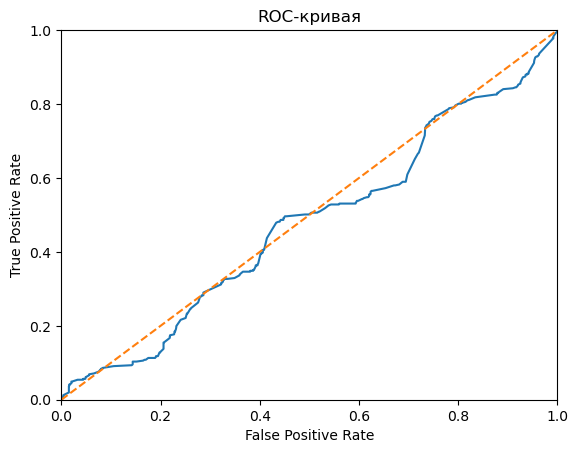

In [56]:
model_probabilities_one = model.predict_proba(features_test)[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, model_probabilities_one) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

## Вывод

Результат был достигнут. Модель прошла проверку на качество и достигла нужного показателя F1.
  
Итоговые показатели на тестовой выборке:  

Полнота 0.7174447174447175  
Точность 0.5186500888099467  
F1 мера 0.6020618556701031  
AUC ROC 0.855885160969907    
 
У данной модели хорошая полнота и средняя точность. Я бы не советовала использовать данную модель для работы с реальными клиентами.   